Nessa versão do modelo, serão adicionadas taxas de natalidade e mortalidade de humanos $\mu_H$, para representar a entrada de novos indivíduos em $S$ ao longo dos anos. Também será incluído o fator multiplicativo $k$, para analisar o efeito da aproximação no contato entre hospedeiro e vetor na presença de desmatamento.

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from numpy import cos
from math import log
from scipy.interpolate import interp1d
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from sage.plot.plot3d.parametric_surface import ParametricSurface
import plotly.graph_objects as go
import plotly.express as px

In [2]:
anos = [1970, 1980, 1996, 2000, 2007, 2010] 
pop = [311622, 633383, 1154330, 1405835, 1646602, 1802014] 

In [3]:
interpolate_2004 = 2004
  
y_interp = interp1d(anos, pop)
print("A população no ano {} foi estimada (2000-2007) como".format(interpolate_2004),
      (y_interp(interpolate_2004)).round())

print("A população rural no ano {} foi estimada (2000-2007) como".format(interpolate_2004),
      ((y_interp(interpolate_2004))*(0.005)).round())
print(' ')
interpolate_2005 = 2005
  
y_interp = interp1d(anos, pop)
print("A população no ano {} foi estimada (2000-2007) como".format(interpolate_2005),
      (y_interp(interpolate_2005)).round())

print("A população rural no ano {} foi estimada (2000-2007) como".format(interpolate_2005),
      ((y_interp(interpolate_2005))*(0.005)).round())
print(' ')
interpolate_2006 = 2006
  
y_interp = interp1d(anos, pop)
print("A população no ano {} foi estimada (2000-2007) como".format(interpolate_2006),
      (y_interp(interpolate_2006)).round())

print("A população rural no ano {} foi estimada (2000-2007) como".format(interpolate_2006),
      ((y_interp(interpolate_2006))*(0.005)).round())
print(' ')
interpolate_2007 = 2007
  
y_interp = interp1d(anos, pop)
print("A população no ano {} foi estimada (2000-2007) como".format(interpolate_2007),
      (y_interp(interpolate_2007)).round())

print("A população rural no ano {} foi estimada (2000-2007) como".format(interpolate_2007),
      ((y_interp(interpolate_2007))*(0.005)).round())
print(' ')
interpolate_2008 = 2008
  
y_interp = interp1d(anos, pop)
print("A população no ano {} foi estimada (2007-2010) como".format(interpolate_2008),
      (y_interp(interpolate_2008)).round())

print("A população rural no ano {} foi estimada (2007-2010) como".format(interpolate_2008),
      ((y_interp(interpolate_2008))*(0.005)).round())
print(' ')
interpolate_2009 = 2009
  
y_interp = interp1d(anos, pop)
print("A população no ano {} foi estimada (2007-2010) como".format(interpolate_2009),
      (y_interp(interpolate_2009)).round())

print("A população rural no ano {} foi estimada (2007-2010) como".format(interpolate_2009),
      ((y_interp(interpolate_2009))*(0.005)).round())
print(' ')
interpolate_2010 = 2010
  
y_interp = interp1d(anos, pop)
print("A população no ano {} foi estimada (2007-2010) como".format(interpolate_2010),
      (y_interp(interpolate_2010)).round())

print("A população rural no ano {} foi estimada (2007-2010) como".format(interpolate_2010),
      ((y_interp(interpolate_2010))*(0.005)).round())

A população no ano 2004 foi estimada (2000-2007) como 1543416.0
A população rural no ano 2004 foi estimada (2000-2007) como 7717.0
 
A população no ano 2005 foi estimada (2000-2007) como 1577811.0
A população rural no ano 2005 foi estimada (2000-2007) como 7889.0
 
A população no ano 2006 foi estimada (2000-2007) como 1612207.0
A população rural no ano 2006 foi estimada (2000-2007) como 8061.0
 
A população no ano 2007 foi estimada (2000-2007) como 1646602.0
A população rural no ano 2007 foi estimada (2000-2007) como 8233.0
 
A população no ano 2008 foi estimada (2007-2010) como 1698406.0
A população rural no ano 2008 foi estimada (2007-2010) como 8492.0
 
A população no ano 2009 foi estimada (2007-2010) como 1750210.0
A população rural no ano 2009 foi estimada (2007-2010) como 8751.0
 
A população no ano 2010 foi estimada (2007-2010) como 1802014.0
A população rural no ano 2010 foi estimada (2007-2010) como 9010.0


In [4]:
print('População média de Manaus entre 2004 e 2008: 1615688.4') #{n((1543416.0+1577811.0+1612207.0+1646602.0+1698406.0)/5)}')

População média de Manaus entre 2004 e 2008: 1615688.4


In [5]:
print(f'População média da zona rural de Manaus entre 2004 e 2008: {n((1543416.0+1577811.0+1612207.0+1646602.0+1698406.0)*(0.001))}')

População média da zona rural de Manaus entre 2004 e 2008: 8078.44200000000


In [6]:
print('Diferença da população entre 2004 e 2005:')
print(((y_interp(interpolate_2005))*(0.005)).round() - ((y_interp(interpolate_2004))*(0.005)).round())
print(' ')
print('Diferença da população entre 2008 e 2007:')
print(((y_interp(interpolate_2008))*(0.005)).round() - ((y_interp(interpolate_2007))*(0.005)).round())
print(' ')
print('Diferença da população entre 2009 e 2010:')
print(((y_interp(interpolate_2010))*(0.005)).round() - ((y_interp(interpolate_2009))*(0.005)).round())

Diferença da população entre 2004 e 2005:
172.0
 
Diferença da população entre 2008 e 2007:
259.0
 
Diferença da população entre 2009 e 2010:
259.0


In [7]:
print(f'Aumento populacional anual em média na zona rural: {n(((172*3)+(259*2))/5)}')

Aumento populacional anual em média na zona rural: 206.800000000000


In [8]:
print('Diferença da população entre 2004 e 2005:')
print(((y_interp(interpolate_2005))).round() - ((y_interp(interpolate_2004))).round())
print(' ')
print('Diferença da população entre 2008 e 2007:')
print(((y_interp(interpolate_2008))).round() - ((y_interp(interpolate_2007))).round())
print(' ')
print('Diferença da população entre 2009 e 2010:')
print(((y_interp(interpolate_2010))).round() - ((y_interp(interpolate_2009))).round())

Diferença da população entre 2004 e 2005:
34395.0
 
Diferença da população entre 2008 e 2007:
51804.0
 
Diferença da população entre 2009 e 2010:
51804.0


In [9]:
print(f'Aumento populacional anual em média em Manaus: {n(((34395*3)+(51804*2))/5)}')

Aumento populacional anual em média em Manaus: 41358.6000000000


Dessa maneira, a interpolação é feita utilizando pontos iniciais e finais diferentes para 2008 e 2009 em comparação com os demais, visto que, como temos dados para 2007, a interpolação é feita com esse valor para pontos até esse ano, e a partir dele usa 2010 como ponto final da interpolação.

Assim, temos $N_0=7717$ e a taxa de natalidade/mortalidade ($\mu_H$) considerada será de 206.8/365/8078.442 por por pessoa por dia

In [10]:
mu_H = n(206.8/365/8078.442)
mu_H

0.0000701342341092198

#### Modelando:

In [11]:
T_linha = 19.9
T1= 26.4 
T2= 0.025
omega1= 0.017
phi1= -1.45

R1= 250.083 
R2= 0.565
omega2= 0.02
phi2=1.6

B_E=200
p_ME=0.9
p_ML=0.75
p_MP=0.85
tau_E=1
tau_P=1
# c1=0.019
# c2=-0.021
c1=0.00554
c2=-0.06737
mu_H = 0.00007

D1=36.5
b1=0.04

A=12.5
B=15
C=-48.78

b2=0.09
tau_H=10
DD=105
Tmin=14.5
gamma= 1/120 #365 
R_L = 450
N = 7717 #População estimada para 2004
M = 300000 
k=1 #Análise sem efeito do desmatamento

E_M0 = 1 #Analisando a infecção iniciando com apenas um mosquito exposto e um humano infectado
I_H0 = 1
I_M0 = 0
R_H0 = 0
if E_M0 is None:
        E_M0 = M / 100

S_H0 = N - I_H0 - R_H0
S_M0 = M - E_M0 - I_M0

Com essa inclusão do parâmetro $\mu_H$, foi necessário modificar o cálculo prévio do $\mathcal{R}_0$:

In [12]:
def R0_sir(a, k, b2, gamma, mu_H):
    return abs((a * k * b2) / (gamma + mu_H))
    
#R0_sir_curr = R0_sir(a_curr, b2, gamma)
    
def R0_sei(a, k, b1, b3, l, mu):
    return abs((a * k * b1 * b3) / ((b3 + l) * mu + mu** 2))
    
#R0_sei_curr = R0_sei(a_curr, b1, b3_curr, l_curr, mu_curr)
    
def R0_full(a, k, b1, b2, b3, gamma, l, mu, mu_H):
    return abs(((a**2 * b1 * b2 * b3 * k**2) / (mu*(gamma + mu_H)*(b3 + l + mu)))**(1/2))
    
#R0_curr = R0(a_curr, b1, b2, b3_curr, gamma, l_curr, mu_curr)

In [13]:
def calculate_initial_values(R_L, T_linha, Tmin, DD, D1, T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                            p_ML, p_ME, p_MP, c1, c2, A, B, C, b1, b2, gamma, mu_H, k):
    
    T0 = T1 * (1 + T2 * cos(omega1 * 0 - phi1))
    R0 = R1 * (1 + R2 * cos(omega2 * 0 - phi2))

    tau_L0 = 1 / (c1 * T0 + c2)

    p_LT0 = np.exp(-(c1 * T0 + c2))
    
    p_LR0 = (4 * p_ML / R_L**2) * R0 * (max(1e-5, R_L - R0))
    
    p_LRT0 = p_LR0 * p_LT0
    
    p_ER0 = (4 * p_ME / R_L**2) * R0 * (max(1e-5, R_L - R0))
    
    p_PR0 = (4 * p_MP / R_L**2) * R0 * (max(1e-5, R_L - R0))

    a0 = (max(1e-5, T0 - T_linha)) / D1
    b0 = B_E * p_ER0 * p_LRT0 * p_PR0 / (tau_E + tau_L0 + tau_P)

    tau_M0 = DD / (max(1e-5, T0 - Tmin))
    
    b30 =  1 / tau_M0
    
    p0 = np.exp(-1 / (A * T0**2 + B * T0 + C))
    l0 = p0 ** tau_M0

    mu0 = -log(p0)

    initial_R0_sir = R0_sir(a0, k, b2, gamma, mu_H)
    initial_R0_sei = R0_sei(a0, k, b1, b30, l0, mu0)
    initial_R0_full = R0_full(a0, k, b1, b2, b30, gamma, l0, mu0, mu_H)
    
    return initial_R0_sir, initial_R0_sei, initial_R0_full, a0

In [14]:
initial_R0_sir, initial_R0_sei, initial_R0_full, a0 = calculate_initial_values(R_L, T_linha, Tmin, DD, D1, 
                                                                               T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                                                                               p_ML, p_ME, p_MP, c1, c2, A, B, C, b1, b2, 
                                                                               gamma, mu_H, k)

In [15]:
print(f'R0_sir = {initial_R0_sir} \nR0_sei = {initial_R0_sei}\nR0_acoplado = {initial_R0_full}\nTaxa de picadas = {a0}')

R0_sir = 1.930603308647107 
R0_sei = 6.7341804682519975
R0_acoplado = 3.6056942595059316
Taxa de picadas = 0.18026114596664286


In [16]:
def model(t, z, T_linha, T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, E_M0, I_H0, I_M0, R_H0, mu_H, k):
    
    S_H, I_H, R_H, S_M, E_M, I_M = z
    
    # Funções de temperatura e chuva
    def Temp(t):
        return T1 * (1 + T2 * cos(omega1 * t - phi1))

    def Rain(t):
        return R1 * (1 + R2 * cos(omega2 * t - phi2))

    R_curr = Rain(t)
    T_curr = Temp(t)
    
    # Duração da fase de desenvolvimento das larvas
    def tau_L(Temp):
        return 1 / (c1 * Temp + c2)
    
    # Taxa diária de sobrevivência dos mosquitos
    def p(Temp):
        return np.exp(-1 / (A*Temp**2 + B*Temp + C))
    
    # Probabilidade de sobrevivência das larvas dependente de temperatura e chuva
    def p_LT(Temp):
        return np.exp(-(c1 * Temp + c2))
    
    def p_LR(Rain):
        return (4*p_ML/R_L**2) * Rain * (max(10^-5,R_L - Rain))
    
    def p_LRT(Rain,Temp):
        return p_LR(Rain)*p_LT(Temp)
    
    # Probabilidade de sobrevivência dos ovos e pupas dependente de chuva (Não definido previamente)
    def p_ER(Rain):
        return (4*p_ME/R_L**2) * Rain * (max(10^-5,R_L - Rain))
    
    # Probabilidade de sobrevivência dos ovos e pupas dependente de chuva (Não definido previamente)
    def p_PR(Rain):
        return (4*p_MP/R_L**2) * Rain * (max(10^-5,R_L - Rain))

    # Duração do ciclo esporogônico
    def tau_M(Temp):
        return DD / (max(10^-5,Temp - Tmin))
    
    tau_M_curr = tau_M(T_curr)

    # Taxa de infecção de expostos (1/Duração do ciclo esporogônico)
    def b3(tau_M, Temp):
        return 1/tau_M
    
    b3_curr = b3(tau_M_curr, T_curr)
    
    # Definindo a função de sobrevivência do mosquito
    def l_tau_M(tau_M, Temp):  
        p_T = p(Temp)
        return p_T**tau_M
    
    l_curr = l_tau_M(tau_M_curr, T_curr)

    # Definindo a taxa de mortalidade do mosquito
    def mu(Temp):
        return -log(p(Temp))
    
    mu_curr = mu(T_curr)
    
    # Calcula a taxa de picada e probabilidade de transmissão
    def a(Temp):
        return (max(10^-5, Temp - T_linha)) / D1
    
    a_curr = a(T_curr)
    
    def b(Rain,Temp):
        return B_E * p_ER(Rain) * p_LRT(Rain,Temp) * p_PR(Rain) / (tau_E + tau_L(Temp) + tau_P)
    
    b_curr = b(R_curr, T_curr)
    
    dShdt = mu_H * N -a_curr * k * b2 * (I_M / N) * S_H - mu_H * S_H
    dIhdt = a_curr * k * b2 * (I_M / N) * S_H - gamma * I_H - mu_H * I_H
    dRhdt = gamma * I_H - mu_H * R_H
    
    dSmdt = b_curr - a_curr * k * b1 * (I_H / N) * S_M - mu_curr * S_M
    dEmdt = a_curr * k * b1 * (I_H / N) * S_M - mu_curr * E_M - b3_curr * E_M - l_curr * E_M
    dImdt = b3_curr * E_M - mu_curr * I_M
    
    return [dShdt, dIhdt, dRhdt, dSmdt, dEmdt, dImdt] 

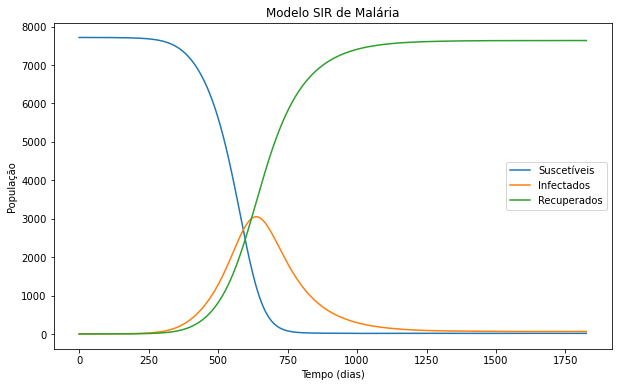

In [17]:
args = (T_linha, T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, E_M0, I_H0, I_M0, R_H0, mu_H, k)

t_eval = np.linspace(0, 1825, 1000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(model, [0, 1825], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_H, label='Suscetíveis')
plt.plot(times, I_H, label='Infectados')
plt.plot(times, R_H, label='Recuperados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SIR de Malária')

plt.legend()

plt.show()

In [18]:
max(I_H)

3051.083511856854

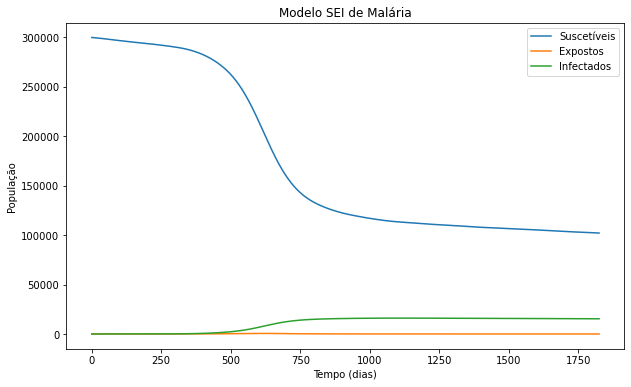

In [19]:
t_eval = np.linspace(0, 1825, 1000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(model, [0, 1825], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_M, label='Suscetíveis')
plt.plot(times, E_M, label='Expostos')
plt.plot(times, I_M, label='Infectados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SEI de Malária')

plt.legend()

plt.show()

Como esperado, com $\mathcal{R}_0$ menor que 1, e apenas 1 mosquito exposto e 1 humano infectado, a doença não consegue se estabelecer.

Agora, vamos conferir que a população de infectadostambém não conseguirá se estabelecer em equilíbrio endêmico mesmo com um número maior de expostos e infectados:

In [20]:
E_M0 = 10000
I_H0 = 500
I_M0 = 0
R_H0 = 0
if E_M0 is None:
        E_M0 = M / 100

S_H0 = N - I_H0 - R_H0
S_M0 = M - E_M0 - I_M0

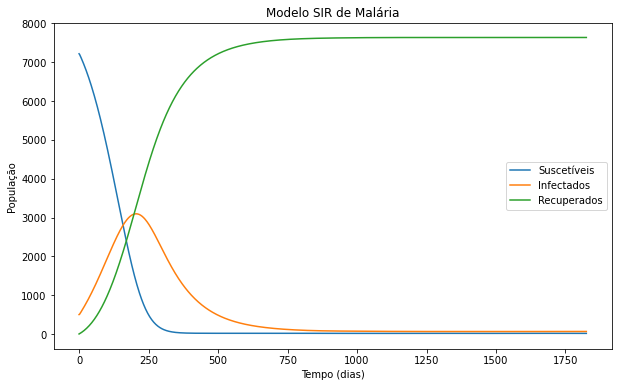

In [21]:
args = (T_linha, T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, E_M0, I_H0, I_M0, R_H0, mu_H, k)

t_eval = np.linspace(0, 1825, 1000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(model, [0, 1825], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_H, label='Suscetíveis')
plt.plot(times, I_H, label='Infectados')
plt.plot(times, R_H, label='Recuperados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SIR de Malária')

plt.legend()

plt.show()

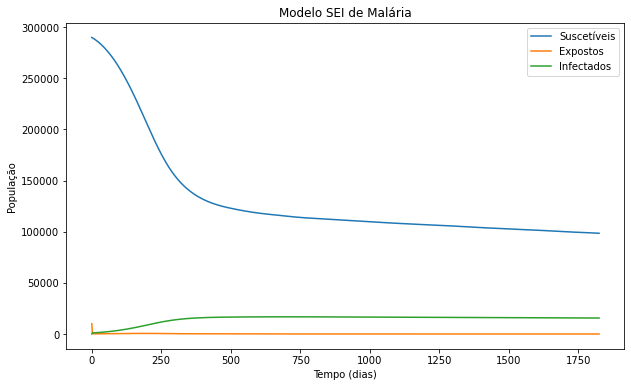

In [22]:
t_eval = np.linspace(0, 1825, 1000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(model, [0, 1825], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_M, label='Suscetíveis')
plt.plot(times, E_M, label='Expostos')
plt.plot(times, I_M, label='Infectados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SEI de Malária')

plt.legend()

plt.show()

In [23]:
E_M0 = 100000
I_H0 = 1000
I_M0 = 0
R_H0 = 0
if E_M0 is None:
        E_M0 = M / 100

S_H0 = N - I_H0 - R_H0
S_M0 = M - E_M0 - I_M0

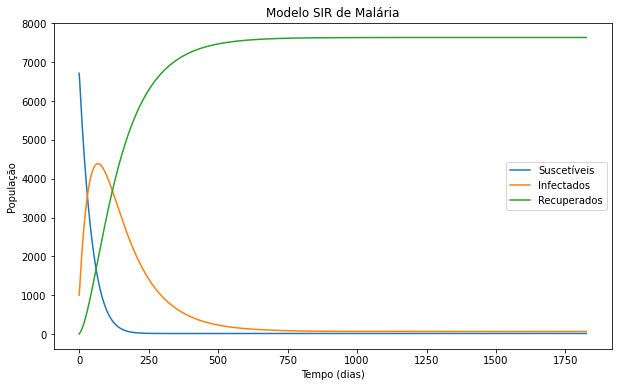

In [24]:
args = (T_linha, T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, E_M0, I_H0, I_M0, R_H0, mu_H, k)

t_eval = np.linspace(0, 1825, 1000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(model, [0, 1825], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_H, label='Suscetíveis')
plt.plot(times, I_H, label='Infectados')
plt.plot(times, R_H, label='Recuperados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SIR de Malária')

plt.legend()

plt.show()

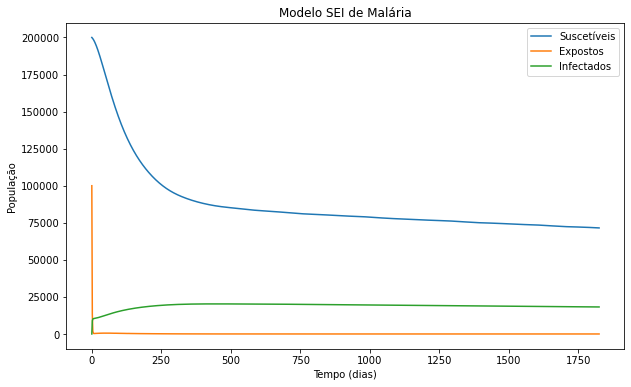

In [25]:
t_eval = np.linspace(0, 1825, 1000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(model, [0, 1825], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_M, label='Suscetíveis')
plt.plot(times, E_M, label='Expostos')
plt.plot(times, I_M, label='Infectados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SEI de Malária')

plt.legend()

plt.show()

Aumentando o número de infectados e expostos, inicialmente com um "pequeno" aumento, com 1/30 da população de mosquitos exposta à doença, e 6.5% de humanos infectados, a população de infectados humanos começa a aumentar, mas não consegue se estabelecer. Prolongando o tempo de análise, será possível ver que a população se extinguirá nos anos seguintes. Idealmente, seria possível verificar a população de infectados tendendo a 0 ainda no tempo da análise. No caso dos mosquitos, a população inicial de expostos quase que imediatamente se torna de infectados, se estabilizando em cerca de 5000 indivíduos, mas não é possível perceber a população de infectados se extinguindo, mesmo prolongando o tempo de análise. Esse comportamento ainda pode ser notado quando 1/3 da população começa exposto, rapidamente se tornando infectada, mas se estabelecendo em cerca de 10000 indivíduos. Por outro lado, iniciando a população humana com cerca de 13% de infectados, é possível ver que essa população tem um aumento ao longo do primeiro ano, chegando a quase 41% da população, mas posteriormente decaindo.

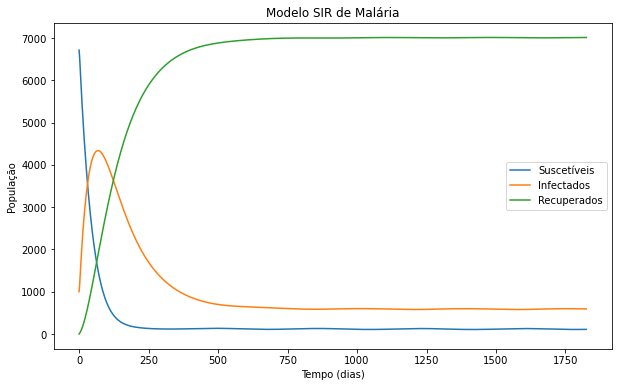

In [26]:
args = (T_linha, T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, E_M0, I_H0, I_M0, R_H0, 0.0007, k)

t_eval = np.linspace(0, 1825, 1000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(model, [0, 1825], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_H, label='Suscetíveis')
plt.plot(times, I_H, label='Infectados')
plt.plot(times, R_H, label='Recuperados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SIR de Malária')

plt.legend()

plt.show()

In [27]:
initial_R0_sir, initial_R0_sei, initial_R0_full, a0 = calculate_initial_values(R_L, T_linha, Tmin, DD, D1, 
                                                                           T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                                                                           p_ML, p_ME, p_MP, c1, c2, A, B, C, b1, b2, gamma, 0.0007, k)

In [28]:
print(f'R0_sir = {initial_R0_sir} \nR0_sei = {initial_R0_sei}\nR0_acoplado = {initial_R0_full}\nTaxa de picadas = {a0}')

R0_sir = 1.7959597568632317 
R0_sei = 6.7341804682519975
R0_acoplado = 3.4776884731722277
Taxa de picadas = 0.18026114596664286


Analisando um aumento de $\mu_H$ com o valor inicial anterior de mosquitos expostos e humanos infectados, é possível notar que, mesmo diminuindo $\mathcal{R}_0$, a população de infectados não tende a 0 devido à maior entrada de novos indivíduos no compartimento $S_H$.

Agora, incluindo o parâmetro $k$ na análise:

In [29]:
initial_R0_sir, initial_R0_sei, initial_R0_full, a0 = calculate_initial_values(R_L, T_linha, Tmin, DD, D1, 
                                                                               T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                                                                               p_ML, p_ME, p_MP, c1, c2, A, B, C, b1, b2, 
                                                                                gamma, mu_H, 1)

In [30]:
print(f'R0_sir = {initial_R0_sir} \nR0_sei = {initial_R0_sei}\nR0_acoplado = {initial_R0_full}\nTaxa de picadas = {a0}')

R0_sir = 1.930603308647107 
R0_sei = 6.7341804682519975
R0_acoplado = 3.6056942595059316
Taxa de picadas = 0.18026114596664286


In [31]:
initial_R0_sir, initial_R0_sei, initial_R0_full, a0 = calculate_initial_values(R_L, T_linha, Tmin, DD, D1, 
                                                                               T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                                                                               p_ML, p_ME, p_MP, c1, c2, A, B, C, b1, b2, 
                                                                               gamma, mu_H, 1.2)

In [32]:
print(f'R0_sir = {initial_R0_sir} \nR0_sei = {initial_R0_sei}\nR0_acoplado = {initial_R0_full}\nTaxa de picadas = {a0}')

R0_sir = 2.316723970376528 
R0_sei = 8.081016561902397
R0_acoplado = 4.326833111407118
Taxa de picadas = 0.18026114596664286


In [33]:
print(f'k*b1={1.2*b1}')
print(f'k*b2={1.2*b2}')

k*b1=0.0480000000000000
k*b2=0.108000000000000


Aumentando $b_1$ e $b_2$ em 20%, pode se perceber que já é suficiente para que o $\mathcal{R}_0$ do SEI e o acoplado se tornem maiores que 1, e aumente o do SIR de 0.77 para 0.92. Iniciando com $E_{M0} = I_{H0} = 1$, vamos ver como essa população evolui:

In [34]:
E_M0 = 1
I_H0 = 1
I_M0 = 0
R_H0 = 0
if E_M0 is None:
        E_M0 = M / 100

S_H0 = N - I_H0 - R_H0
S_M0 = M - E_M0 - I_M0

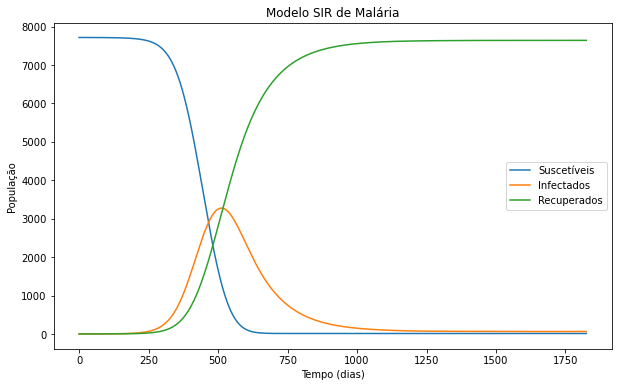

In [35]:
args = (T_linha, T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, E_M0, I_H0, I_M0, R_H0, mu_H, 1.2)

t_eval = np.linspace(0, 1825, 1000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(model, [0, 1825], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_H, label='Suscetíveis')
plt.plot(times, I_H, label='Infectados')
plt.plot(times, R_H, label='Recuperados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SIR de Malária')

plt.legend()

plt.show()

In [36]:
max(I_H)

3275.4709346604704

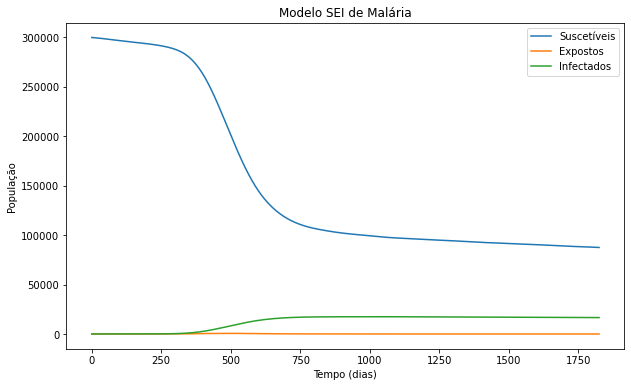

In [37]:
t_eval = np.linspace(0, 1825, 1000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(model, [0, 1825], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_M, label='Suscetíveis')
plt.plot(times, E_M, label='Expostos')
plt.plot(times, I_M, label='Infectados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SEI de Malária')

plt.legend()

plt.show()

Notavelmente, a dinâmica continua muito próximo do que foi visto originalmente. Aumentando agora $b_1$ e $b_2$ em 50%:

In [38]:
initial_R0_sir, initial_R0_sei, initial_R0_full, a0 = calculate_initial_values(R_L, T_linha, Tmin, DD, D1, 
                                                                               T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                                                                               p_ML, p_ME, p_MP, c1, c2, A, B, C, b1, b2, 
                                                                               gamma, mu_H, 1.5)

In [39]:
print(f'R0_sir = {initial_R0_sir} \nR0_sei = {initial_R0_sei}\nR0_acoplado = {initial_R0_full}\nTaxa de picadas = {a0}')

R0_sir = 2.8959049629706604 
R0_sei = 10.101270702377995
R0_acoplado = 5.408541389258897
Taxa de picadas = 0.18026114596664286


In [40]:
print(f'k*b1={1.5*b1}')
print(f'k*b2={1.5*b2}')

k*b1=0.0600000000000000
k*b2=0.135000000000000


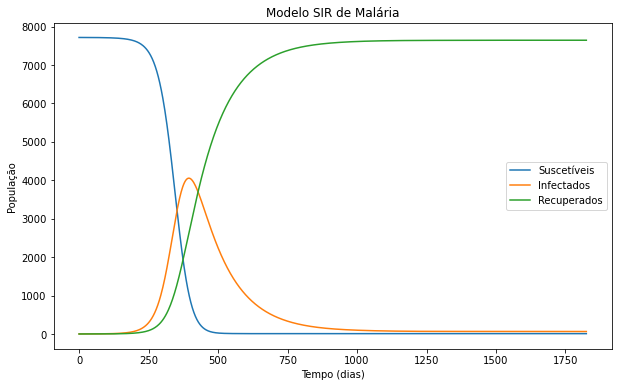

In [41]:
args = (T_linha, T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, E_M0, I_H0, I_M0, R_H0, mu_H, 1.5)

t_eval = np.linspace(0, 1825, 1000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(model, [0, 1825], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_H, label='Suscetíveis')
plt.plot(times, I_H, label='Infectados')
plt.plot(times, R_H, label='Recuperados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SIR de Malária')

plt.legend()

plt.show()

In [42]:
max(I_H)

4054.677334861372

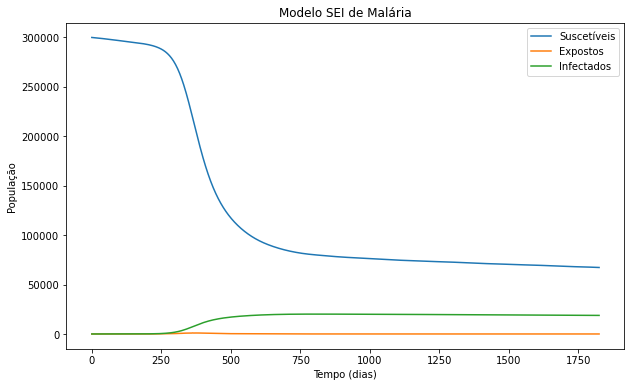

In [43]:
t_eval = np.linspace(0, 1825, 1000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(model, [0, 1825], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_M, label='Suscetíveis')
plt.plot(times, E_M, label='Expostos')
plt.plot(times, I_M, label='Infectados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SEI de Malária')

plt.legend()

plt.show()

Novamente, a diferença não é tanta, mas é possível ver que, aumentando em 20% as proporções, o número de infectados passa aproximadamente de 4 para 10, um aumento de 150%, e aumentando em 50%, passa para aproximadamente 42, um aumento de 950%. Dobrando as proporções originais:

In [44]:
initial_R0_sir, initial_R0_sei, initial_R0_full, a0 = calculate_initial_values(R_L, T_linha, Tmin, DD, D1, 
                                                                               T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                                                                               p_ML, p_ME, p_MP, c1, c2, A, B, C, b1, b2, 
                                                                               gamma, mu_H, 2)

In [45]:
print(f'R0_sir = {initial_R0_sir} \nR0_sei = {initial_R0_sei}\nR0_acoplado = {initial_R0_full}\nTaxa de picadas = {a0}')

R0_sir = 3.861206617294214 
R0_sei = 13.468360936503995
R0_acoplado = 7.211388519011863
Taxa de picadas = 0.18026114596664286


In [46]:
print(f'k*b1={2*b1}')
print(f'k*b2={2*b2}')

k*b1=0.0800000000000000
k*b2=0.180000000000000


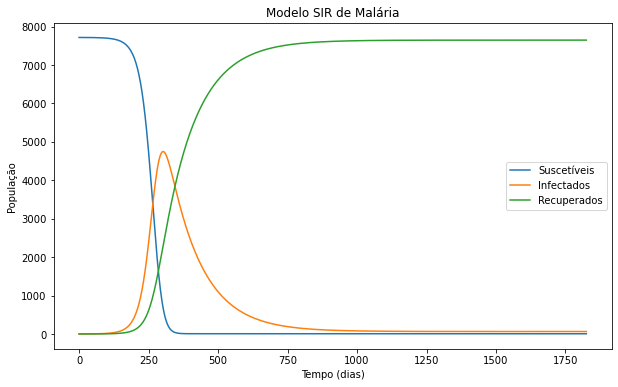

In [47]:
args = (T_linha, T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, E_M0, I_H0, I_M0, R_H0, mu_H, 2)

t_eval = np.linspace(0, 1825, 1000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(model, [0, 1825], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_H, label='Suscetíveis')
plt.plot(times, I_H, label='Infectados')
plt.plot(times, R_H, label='Recuperados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SIR de Malária')

plt.legend()

plt.show()

In [48]:
max(I_H)

4746.6618817108

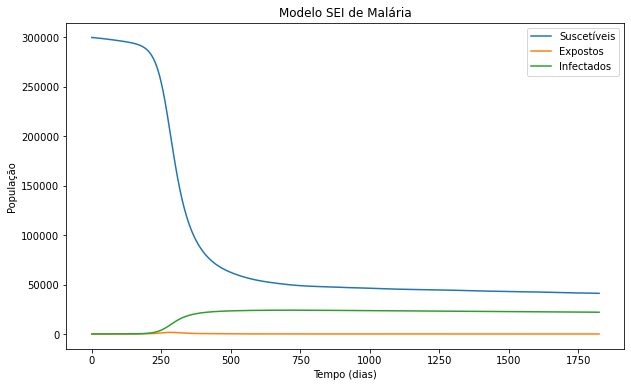

In [49]:
t_eval = np.linspace(0, 1825, 1000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(model, [0, 1825], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_M, label='Suscetíveis')
plt.plot(times, E_M, label='Expostos')
plt.plot(times, I_M, label='Infectados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SEI de Malária')

plt.legend()

plt.show()

Dobrando a proporção de picadas causando infecção, já é possível notar que o número de infectados começa a aumentar, ainda que quase no final do período. Agora, como verificado no notebook Plota_Equilibrio_e_R0, $\mathcal{R}_0$ toma valor 1 quando $k= 2.0746963059512207$:

In [50]:
initial_R0_sir, initial_R0_sei, initial_R0_full, a0 = calculate_initial_values(R_L, T_linha, Tmin, DD, D1, 
                                                                               T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                                                                               p_ML, p_ME, p_MP, c1, c2, A, B, C, b1, b2, 
                                                                               gamma, mu_H, 2.0746963059512207)

In [51]:
print(f'R0_sir = {initial_R0_sir} \nR0_sei = {initial_R0_sei}\nR0_acoplado = {initial_R0_full}\nTaxa de picadas = {a0}')

R0_sir = 4.00541555270736 
R0_sei = 13.97137934109128
R0_acoplado = 7.480720560586478
Taxa de picadas = 0.18026114596664286


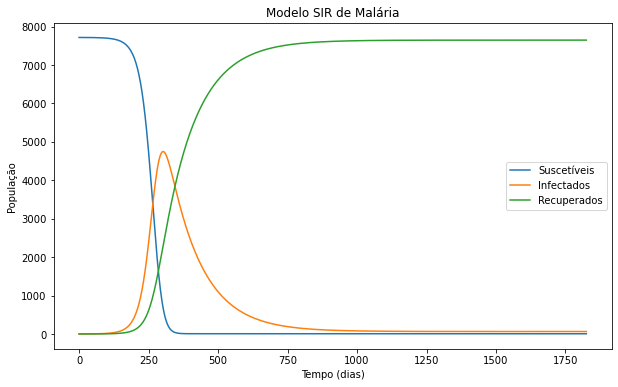

In [52]:
args = (T_linha, T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, E_M0, I_H0, I_M0, R_H0, mu_H, 2)

t_eval = np.linspace(0, 1825, 1000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(model, [0, 1825], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_H, label='Suscetíveis')
plt.plot(times, I_H, label='Infectados')
plt.plot(times, R_H, label='Recuperados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SIR de Malária')

plt.legend()

plt.show()

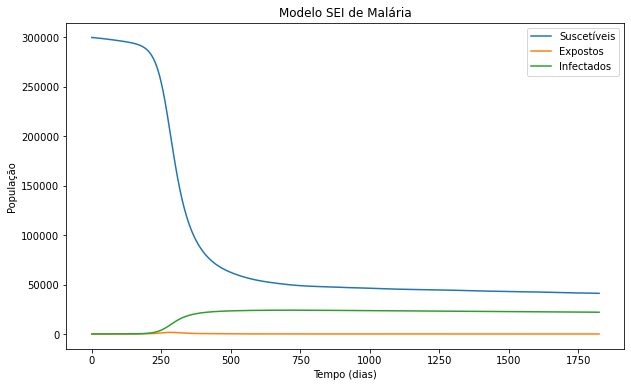

In [53]:
t_eval = np.linspace(0, 1825, 1000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(model, [0, 1825], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_M, label='Suscetíveis')
plt.plot(times, E_M, label='Expostos')
plt.plot(times, I_M, label='Infectados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SEI de Malária')

plt.legend()

plt.show()

Usando $k=2.5$:

In [54]:
initial_R0_sir, initial_R0_sei, initial_R0_full, a0 = calculate_initial_values(R_L, T_linha, Tmin, DD, D1, 
                                                                               T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                                                                               p_ML, p_ME, p_MP, c1, c2, A, B, C, b1, b2, 
                                                                               gamma, mu_H, 2.5)

In [55]:
print(f'R0_sir = {initial_R0_sir} \nR0_sei = {initial_R0_sei}\nR0_acoplado = {initial_R0_full}\nTaxa de picadas = {a0}')

R0_sir = 4.826508271617768 
R0_sei = 16.83545117062999
R0_acoplado = 9.01423564876483
Taxa de picadas = 0.18026114596664286


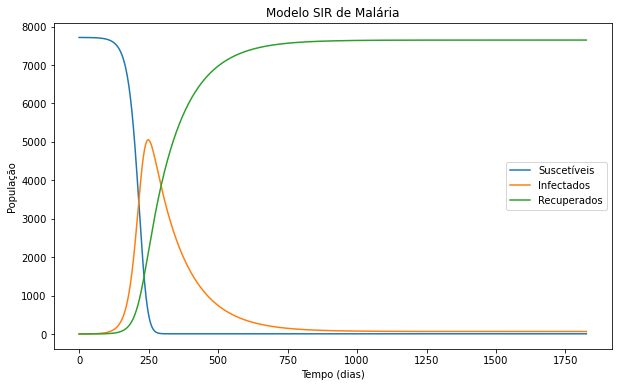

In [56]:
args = (T_linha, T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, E_M0, I_H0, I_M0, R_H0, mu_H, 2.5)

t_eval = np.linspace(0, 1825, 1000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(model, [0, 1825], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_H, label='Suscetíveis')
plt.plot(times, I_H, label='Infectados')
plt.plot(times, R_H, label='Recuperados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SIR de Malária')

plt.legend()

plt.show()

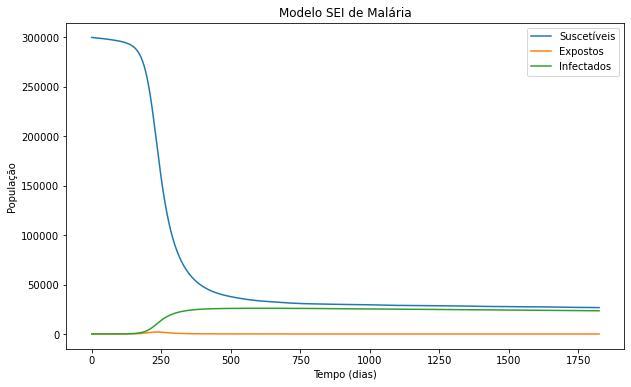

In [57]:
t_eval = np.linspace(0, 1825, 1000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(model, [0, 1825], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_M, label='Suscetíveis')
plt.plot(times, E_M, label='Expostos')
plt.plot(times, I_M, label='Infectados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SEI de Malária')

plt.legend()

plt.show()

Usando $k=5$:

In [58]:
initial_R0_sir, initial_R0_sei, initial_R0_full, a0 = calculate_initial_values(R_L, T_linha, Tmin, DD, D1, 
                                                                               T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                                                                               p_ML, p_ME, p_MP, c1, c2, A, B, C, b1, b2, 
                                                                               gamma, mu_H, 5)

In [59]:
print(f'R0_sir = {initial_R0_sir} \nR0_sei = {initial_R0_sei}\nR0_acoplado = {initial_R0_full}\nTaxa de picadas = {a0}')

R0_sir = 9.653016543235536 
R0_sei = 33.67090234125998
R0_acoplado = 18.02847129752966
Taxa de picadas = 0.18026114596664286


In [60]:
print(f'k*b1={5*b1}')
print(f'k*b2={5*b2}')

k*b1=0.200000000000000
k*b2=0.450000000000000


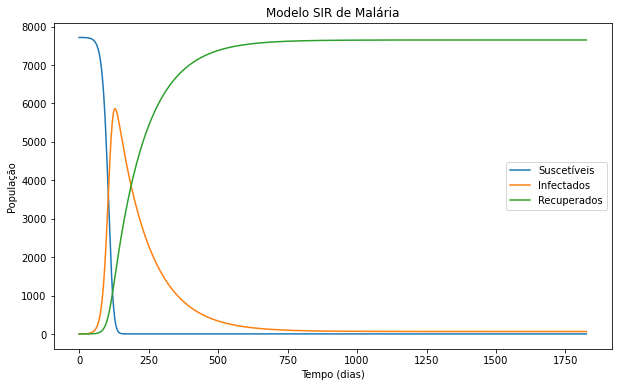

In [61]:
args = (T_linha, T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, E_M0, I_H0, I_M0, R_H0, mu_H, 5)

t_eval = np.linspace(0, 1825, 1000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(model, [0, 1825], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_H, label='Suscetíveis')
plt.plot(times, I_H, label='Infectados')
plt.plot(times, R_H, label='Recuperados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SIR de Malária')

plt.legend()

plt.show()

In [62]:
max(I_H)

5864.004450215983

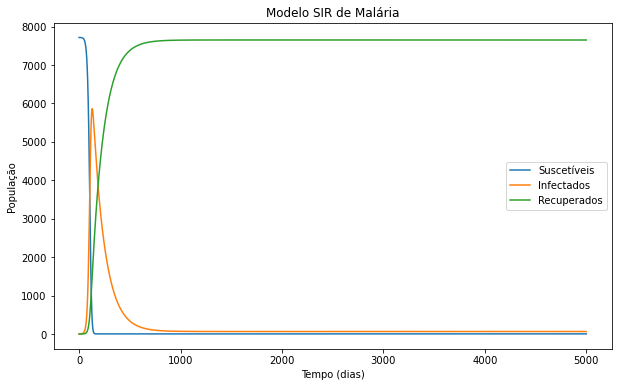

In [63]:
args = (T_linha, T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, E_M0, I_H0, I_M0, R_H0, mu_H, 5)

t_eval = np.linspace(0, 5000, 1000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(model, [0, 5000], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_H, label='Suscetíveis')
plt.plot(times, I_H, label='Infectados')
plt.plot(times, R_H, label='Recuperados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SIR de Malária')

plt.legend()

plt.show()

In [64]:
I_H[-1]

64.34745218900463

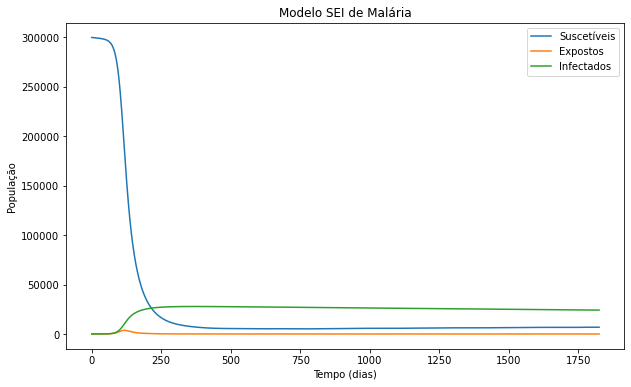

In [65]:
t_eval = np.linspace(0, 1825, 1000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(model, [0, 1825], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_M, label='Suscetíveis')
plt.plot(times, E_M, label='Expostos')
plt.plot(times, I_M, label='Infectados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SEI de Malária')

plt.legend()

plt.show()

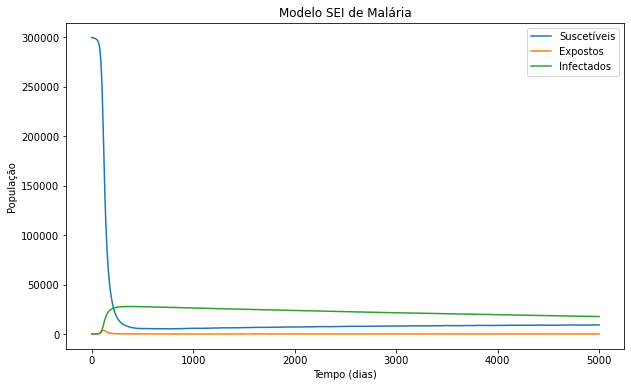

In [66]:
t_eval = np.linspace(0, 5000, 1000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(model, [0, 5000], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_M, label='Suscetíveis')
plt.plot(times, E_M, label='Expostos')
plt.plot(times, I_M, label='Infectados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SEI de Malária')

plt.legend()

plt.show()

In [67]:
I_M[-1]

17655.103979075044

Agora, já é bem mais perceptível a evolução da doença. Mesmo iniciando com um único mosquito e humano infectado, a malária consegue se estabelecer, se mantendo com cerca de 200 humanos infectados e 16000 mosquitos infectados mesmo anos após o início da transmissão.

Passando $k=10$, a proporção de picadas de mosquitos infectados em humanos suscetíveis causando infecção será de 90%. Nesse caso, esse se torna um $k$ quase máximo para afetar simultaneamente $b_1$ e $b_2$, para que a proporção de picadas bem sucedidas 

In [68]:
initial_R0_sir, initial_R0_sei, initial_R0_full, a0 = calculate_initial_values(R_L, T_linha, Tmin, DD, D1, 
                                                                               T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                                                                               p_ML, p_ME, p_MP, c1, c2, A, B, C, b1, b2, 
                                                                               gamma, mu_H, 10)

In [69]:
print(f'R0_sir = {initial_R0_sir} \nR0_sei = {initial_R0_sei}\nR0_acoplado = {initial_R0_full}\nTaxa de picadas = {a0}')

R0_sir = 19.30603308647107 
R0_sei = 67.34180468251996
R0_acoplado = 36.05694259505932
Taxa de picadas = 0.18026114596664286


In [70]:
print(f'k*b1={10*b1}')
print(f'k*b2={10*b2}')

k*b1=0.400000000000000
k*b2=0.900000000000000


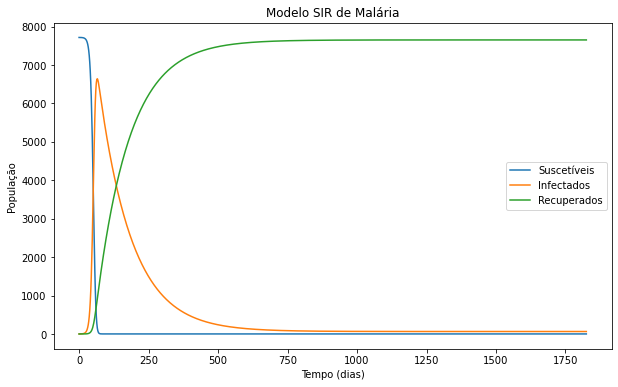

In [71]:
args = (T_linha, T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, E_M0, I_H0, I_M0, R_H0, mu_H, 10)

t_eval = np.linspace(0, 1825, 1000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(model, [0, 1825], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_H, label='Suscetíveis')
plt.plot(times, I_H, label='Infectados')
plt.plot(times, R_H, label='Recuperados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SIR de Malária')

plt.legend()

plt.show()

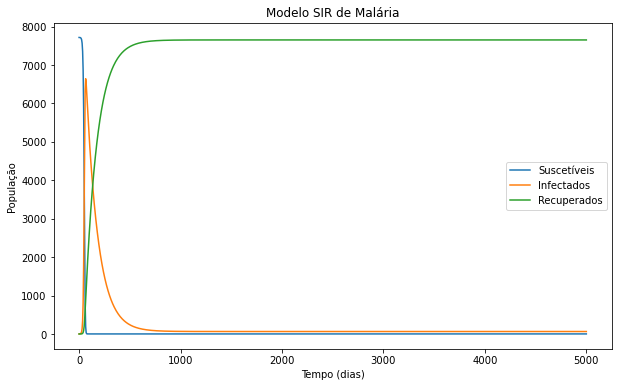

In [72]:
t_eval = np.linspace(0, 5000, 1000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(model, [0, 5000], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_H, label='Suscetíveis')
plt.plot(times, I_H, label='Infectados')
plt.plot(times, R_H, label='Recuperados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SIR de Malária')

plt.legend()

plt.show()

In [73]:
max(I_H)

6642.511196729326

In [74]:
I_H[-1]

64.32091304998356

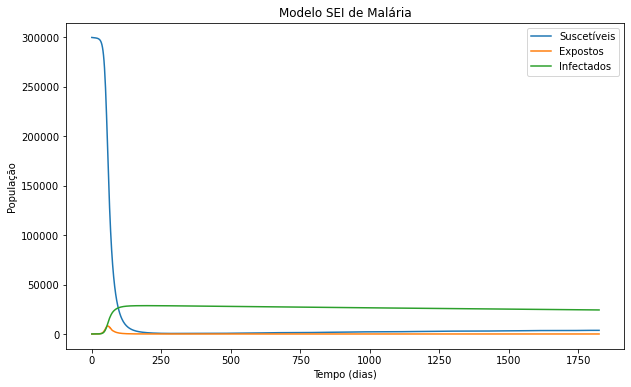

In [75]:
t_eval = np.linspace(0, 1825, 1000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(model, [0, 1825], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_M, label='Suscetíveis')
plt.plot(times, E_M, label='Expostos')
plt.plot(times, I_M, label='Infectados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SEI de Malária')

plt.legend()

plt.show()

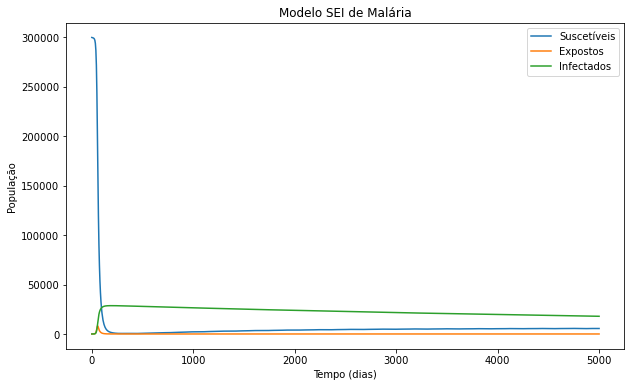

In [76]:
t_eval = np.linspace(0, 5000, 1000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(model, [0, 5000], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_M, label='Suscetíveis')
plt.plot(times, E_M, label='Expostos')
plt.plot(times, I_M, label='Infectados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SEI de Malária')

plt.legend()

plt.show()

In [77]:
I_M[-1]

17905.167829233487

Equilíbrios livres de doença:

$S_H = N, \ I_H=R_H = 0, S_M = \dfrac{b}{\mu}, E_M = I_M = 0$

In [78]:
args = (T_linha, T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, E_M0, I_H0, I_M0, R_H0, mu_H, k)

In [79]:
E_M0 = 0
I_H0 = 0
I_M0 = 0
R_H0 = 0
if E_M0 is None:
        E_M0 = M / 100

S_H0 = N - I_H0 - R_H0
S_M0 = M - E_M0 - I_M0

In [80]:
def Temp(t):
    return T1 * (1 + T2 * cos(omega1 * t - phi1))

def Rain(t):
    return R1 * (1 + R2 * cos(omega2 * t - phi2))

def p(Temp):
    return np.exp(-1 / (A*Temp**2 + B*Temp + C))
    
def mu(Temp):
    return -log(p(Temp))    
    
def p_LT(Temp):
    return np.exp(-(c1 * Temp + c2))
    
def p_LR(Rain):
    return (4*p_ML/R_L**2) * Rain * (max(10^-5,R_L - Rain))
    
def p_LRT(Rain,Temp):
    return p_LR(Rain)*p_LT(Temp)
    
def p_ER(Rain):
    return (4*p_ME/R_L**2) * Rain * (max(10^-5,R_L - Rain))
    
def p_PR(Rain):
    return (4*p_MP/R_L**2) * Rain * (max(10^-5,R_L - Rain))    
    
def tau_L(Temp):
    return 1 / (c1 * Temp + c2)    
    
def b(Rain,Temp):
    return B_E * p_ER(Rain) * p_LRT(Rain,Temp) * p_PR(Rain) / (tau_E + tau_L(Temp) + tau_P)    

print(n(b(Rain(0), Temp(0))/mu(Temp(0))))
print(n(b(Rain(1825), Temp(1825))/mu(Temp(1825))))

64428.0359469161
31097.2151107775


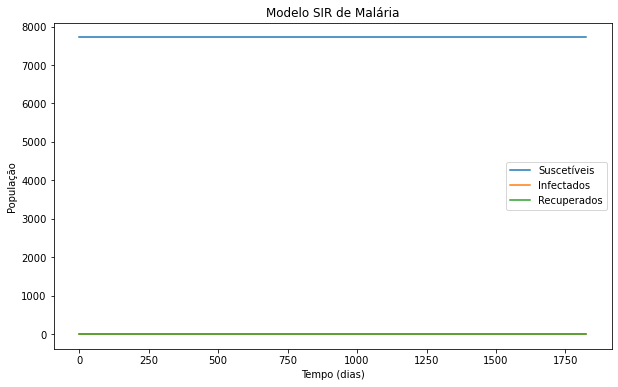

In [81]:
t_eval = np.linspace(0, 1825, 1000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(model, [0, 1825], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_H, label='Suscetíveis')
plt.plot(times, I_H, label='Infectados')
plt.plot(times, R_H, label='Recuperados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SIR de Malária')

plt.legend()

plt.show()

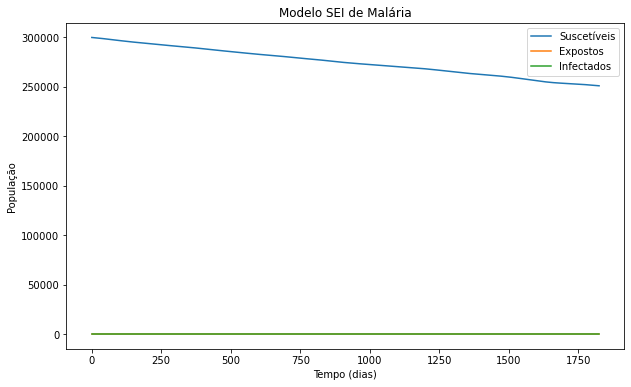

In [82]:
t_eval = np.linspace(0, 1825, 1000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(model, [0, 1825], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_M, label='Suscetíveis')
plt.plot(times, E_M, label='Expostos')
plt.plot(times, I_M, label='Infectados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SEI de Malária')

plt.legend()

plt.show()

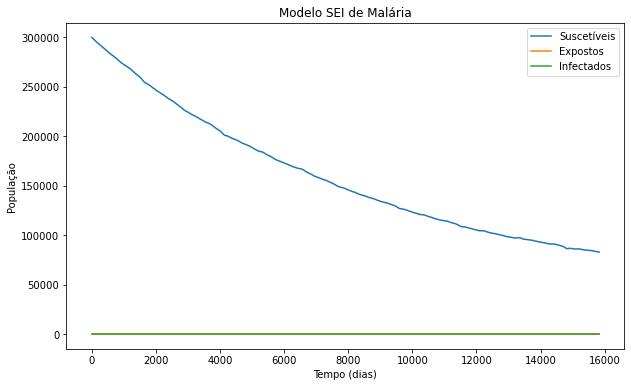

In [83]:
t_eval = np.linspace(0, 15825, 1000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(model, [0, 15825], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_M, label='Suscetíveis')
plt.plot(times, E_M, label='Expostos')
plt.plot(times, I_M, label='Infectados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SEI de Malária')

plt.legend()

plt.show()

In [84]:
S_M[-1]

82798.79055389493

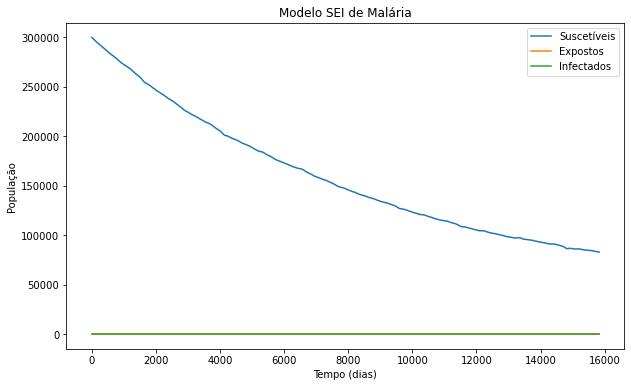

In [85]:
t_eval = np.linspace(0, 15825, 1000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(model, [0, 15825], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_M, label='Suscetíveis')
plt.plot(times, E_M, label='Expostos')
plt.plot(times, I_M, label='Infectados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SEI de Malária')

plt.legend()

plt.show()

In [86]:
S_M[-1]

82798.79055389493

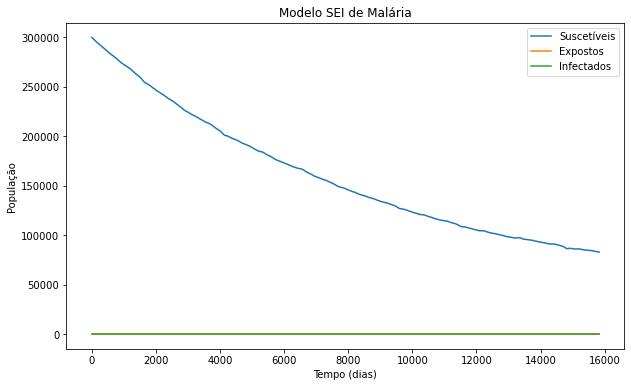

In [87]:
t_eval = np.linspace(0, 15825, 1000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(model, [0, 15825], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_M, label='Suscetíveis')
plt.plot(times, E_M, label='Expostos')
plt.plot(times, I_M, label='Infectados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SEI de Malária')

plt.legend()

plt.show()

In [88]:
S_M[-1]

82798.79055389493

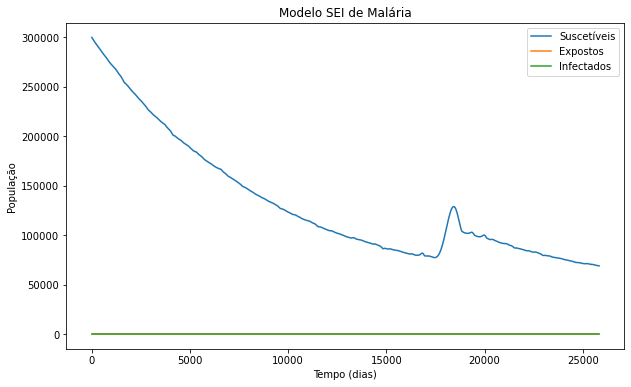

In [89]:
t_eval = np.linspace(0, 25825, 1000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(model, [0, 25825], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_M, label='Suscetíveis')
plt.plot(times, E_M, label='Expostos')
plt.plot(times, I_M, label='Infectados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SEI de Malária')

plt.legend()

plt.show()

In [90]:
S_M[-1]

68917.9760435427

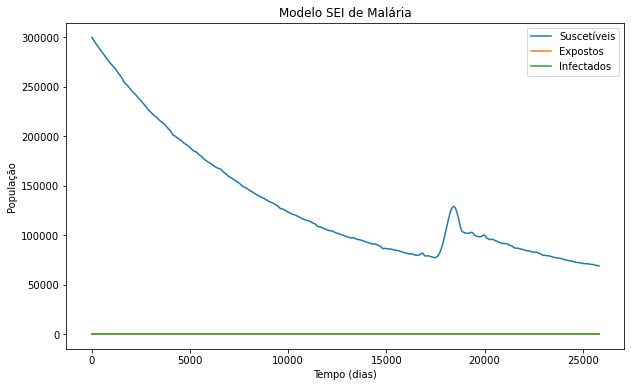

In [91]:
t_eval = np.linspace(0, 25825, 2000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(model, [0, 25825], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_M, label='Suscetíveis')
plt.plot(times, E_M, label='Expostos')
plt.plot(times, I_M, label='Infectados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SEI de Malária')

plt.legend()

plt.show()